## Importación de librerías


# Sistemas discretos

Notebook para calcular las soluciones para sistemas arbitrarios de N masas:

$$ \mathbf{M} \mathbf{\ddot \Psi} = \mathbf{K} \mathbf{\Psi} $$

que cumplen condiciones iniciales:

$$\begin{cases}
\mathbf{\Psi}(t=0) = \mathbf{\Psi_0} \\
\mathbf{\ddot\Psi}(t=0) = \mathbf{\Xi_0}
\end{cases}$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib as npm


%matplotlib notebook

## Ingreso de parámetros

Defino los parámetros *de entrada* de mi sistema. Las unidades son libres, si respeto MKS, todas las magnitudes derivadas lo harán también.

Para cada caso, se deben definir **un vector con las masas de cada partícula**, y **una matriz con las interacciones entre las mismas**. Además debo definir las condiciones iniciales y los tiempos en los que quiero graficar la solución.

### *Template* para agregar nuevos casos 

In [2]:
# M = # vector de masas
# K = # matriz de interacciones
# psi_0 = # vector columna con posiciones iniciales de cada masa
# xi_0 = # vector columna con velocidades iniciales de cada masa
# t = # vector de tiempos para mostrar la solución

### Caso 1

Dos masas iguales unidas entre sí, y a puntos fijos en los costados, mediante tres resortes iguales. Mis parámetros básicos son la masa $m$ y la constante elástica $k$, a partir de ellos armo los parámetros requeridos.

In [3]:
m = 2.  # unidades mks = [kg]
k = 2.  # unidades mks = [N/m]

#### Vector de masas
Defino un vector cuyo elemento $n$ contiene el valor de la masa enésima. Para esto empleo un array 1D (que tendrá dos elementos ya que quiero tener dos masas).

(Nota: array es una manera de almacenar datos multidimensionales en numpy; lo usaremos para representar tanto vectores como matrices).

In [4]:
# El comando ones de numpy me permite generar un array 1D con N = 2 elementos
# que valen 1. Multiplico por el escalar m para que tomen el valor requerido.
# (La multiplicación es equivalente a la de un escalar y un vector).
m_vector = m*np.ones(2)

# Veamos el resultado
m_vector

array([2., 2.])

In [5]:
# Para acceder a los elementos uso notación de corchetes. El primer elemento
# corresponde al índice 0:
m_vector[0]

2.0

In [6]:
# El segundo elemento corresponde al índice 1 (y así hasta el índice N-1)
m_vector[1]

2.0

In [7]:
# Muestro el atributo ndim del array; confirmo que es 1D
m_vector.ndim

1

In [8]:
# Muestro el atributo shape del array; confirmo que tiene dos elementos
m_vector.shape

(2,)

In [9]:
# Otro atributo que puede ser útil es útil es size, me da la cantidad de
# elementos del array
m_vector.size

2

#### Matriz de interacciones
Defino una matriz cuyo elemento $(i,j)$ contiene el coeficiente elástico correspondiente al efecto del desplazamiento de la masa $j$ sobre la aceleración de la masa $i$, **con el signo correspondiente**. Es un array 2D, de dimensiones 2x2:

In [10]:
# El comando array me permite definir matrices y vectores de dimensiones
# arbitrarias, en este caso escribo explícitamente sus elementos usando
# notación de corchetes, y luego multiplico por el escalar k para que la
# matriz tenga el valor requerido.
K = k*np.array([[-2., 1.],[ 1., -2.]])

K

array([[-4.,  2.],
       [ 2., -4.]])

In [11]:
# Para acceder a los elementos de una matriz uso notación de corchetes con
# dos índices, el primero corresponde a la fila, el segundo a la columna,
# comenzando desde 0
print(K[0,0]) # primer elemento de la diagonal
print(K[0,1])
print(K[1,0])
print(K[1,1])

# Nota: uso print para poder tener varias salidas en una misma celda del notebook

-4.0
2.0
2.0
-4.0


In [12]:
# También puedo acceder a una fila o columna de la matriz usando notación de
# corchetes con un único índice:
print(K[:,0]) # primera columna
print(K[:,1])
print(K[0,:]) # primera fila
print(K[1,:])

[-4.  2.]
[ 2. -4.]
[-4.  2.]
[ 2. -4.]


In [13]:
# Podemos obtener los atributos de estos arrays de la siguiente manera:
print(K[0,:].shape)
print(K[0,:].ndim)
print(K[0,:].size)

# lo cual nos permite comprobar que se trata de arrays 1D

(2,)
1
2


In [14]:
K.ndim      # dimensiones

2

In [15]:
K.shape     # forma

(2, 2)

In [16]:
K.size      # cantidad de elementos

4

#### Condiciones iniciales

Defino los vectores $\mathbf{\Psi_0}$ y $\mathbf{\Xi_0}$ a partir de la posición y velocidad inicial de cada masa.


In [17]:
# Aparto una masa de su equilibrio, sistema parte del reposo
pos_masa_1 = 1
pos_masa_2 = 0
vel_masa_1 = 0
vel_masa_2 = 0

Voy a escribir los vectores $\mathbf{\Psi_0}$ y $\mathbf{\Xi_0}$ como vectores columna; para esto debo definirlas como arrays 2D, de dimensiones 2x1:

(Para arrays 1D no existe la distinción entre vector fila y columna) 

In [18]:
# Uso el comando array pero agregando el parametro ndmin=2, y luego uso el atributo T
# que me da la transpuesta (ya que la instrucción por si sola me da un vector fila)
psi_0 = np.array([pos_masa_1, pos_masa_2], ndmin = 2).T          # desplazamientos iniciales

psi_0

array([[1],
       [0]])

In [19]:
xi_0 = np.array([vel_masa_1, vel_masa_2], ndmin = 2).T          # velocidades iniciales

xi_0

array([[0],
       [0]])

In [20]:
# Chequeo que la forma corresponde a vectores columna
print(psi_0.shape)
print(xi_0.shape)

(2, 1)
(2, 1)


#### Tiempos

Defino un vector que contiene los tiempos en los que quiero graficar la solución. Debo indicar los tiempos inicial y final, y la cantidad de puntos que quiero graficar. Uso un array 1D.

In [21]:
t_min     = 0.
t_max     = 10.
n_samples = 1001
t         = np.linspace(t_min, t_max, n_samples)

t

array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ])

### Caso 2: N masas unidas a extremos fijos

In [22]:
N = 100
m = 1
k = 2

m_vector = m*np.ones(N)              # vector de masas

# K es una matriz tridiagonal
K = -2*k*np.diag(np.ones(N)) + k*np.diag(np.ones(N-1),1) + k*np.diag(np.ones(N-1),-1)

psi_0 = np.array(np.zeros(N), ndmin = 2).T
xi_0  = np.array(np.zeros(N), ndmin = 2).T
psi_0[0] = 1.

t = np.linspace(0, 10, 10000)

## Parámetros derivados

In [23]:
# Cantidad de masas
n_masas   = np.size(m_vector)
# Cantidad de samples para el gráfico
n_samples = t.size

## Chequeo de parámetros

Cuando un código tiene muchos parámetros de entrada, es conveniente tener una sección donde se verifique que los mismos sean consistentes. Enumeramos algunos chequeos que pueden ser útiles:

1) Consistencia entre las dimensiones de la matriz de interacciones y la cantidad de masas; ídem para los vectores con las condiciones iniciales.

2) La matriz de interacciones debe ser cuadrada.

3) Todos los parámetros deben ser reales; las masas además deben ser positivas.

4) La diagonal de la matriz de interacciones debe ser negativa para asegurar que las masas sientan fuerzas restitutivas.

A continuación mostramos algunas instrucciones para realizar estos chequeos (hay que refinarlas para casos con muchas masas)

In [24]:
print(n_masas)
print(m_vector.shape)
print(K.shape)
print(psi_0.shape)
print(xi_0.shape)

100
(100,)
(100, 100)
(100, 1)
(100, 1)


In [25]:
m_vector > 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [26]:
np.diagonal(K) < 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [27]:
print(np.iscomplex(m_vector))
print(np.iscomplex(K))
print(np.iscomplex(psi_0))
print(np.iscomplex(xi_0))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]


## Solución del sistema

### Autovalores y autovectores

Antes de plantear la solución, voy a definir una matriz diagonal cuyos elementos representan las masas de cada partícula. Hago esto para poder despejar las masas fácilmente usando álgebra de matrices

$$ \mathbf{M} = \begin{bmatrix} m_1 & & 0 \\  & \ddots \\ 0 & & m_N \end{bmatrix} $$

Para despejar las masas obtengo la matrix inversa:

$$ \mathbf{\ddot \Psi} = \mathbf{M^{-1}} \mathbf{K} \mathbf{\Psi} = \mathbf{\Omega} \mathbf{\Psi} $$ 

El sistema se resuelve a partir de plantear la solución de modos normales:

$$ \mathbf{\Psi} = \mathbf{A} \exp(i \omega t) $$

la cual resulta en el problema de autovalores y autovectores

$$ -\omega^2 \mathbf{a} = \mathbf{\Omega} \mathbf{a}  = \lambda \mathbf{a} $$

In [28]:
# La instruccion diag me permite armar una matriz diagonal a partir de un array 1D
M = np.diag(m_vector)
M

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [29]:
# Esta instruccion me da la matriz inversa, notar que es una matriz diagonal cuyos
# elementos son 1/m_1 ... 1/m_N

M_inv = np.linalg.inv(M)

M_inv

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
# La instrucción dot me permite multiplicar matrices según las reglas del álgebra
# de matrices
W = np.dot(M_inv, K)

W

array([[-4.,  2.,  0., ...,  0.,  0.,  0.],
       [ 2., -4.,  2., ...,  0.,  0.,  0.],
       [ 0.,  2., -4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -4.,  2.,  0.],
       [ 0.,  0.,  0., ...,  2., -4.,  2.],
       [ 0.,  0.,  0., ...,  0.,  2., -4.]])

In [31]:
# Esta instrucción me permite obtener los autovalores y autovectores normalizados de W
l, A = np.linalg.eig(W)

print(l)  # vector de autovalores
print(A)  # matriz de autovectores columna

[-7.99806513e+00 -7.99226239e+00 -7.98259739e+00 -7.96907949e+00
 -7.95172176e+00 -7.93054099e+00 -7.90555768e+00 -1.93487083e-03
 -7.73761147e-03 -1.74026081e-02 -3.81343844e+00 -3.68926461e+00
 -3.93779275e+00 -4.06220725e+00 -4.18656156e+00 -7.87679600e+00
 -4.31073539e+00 -3.56539140e+00 -3.09205105e-02 -4.43460860e+00
 -3.31902578e+00 -4.80322829e+00 -4.68097422e+00 -3.19677171e+00
 -3.07529471e+00 -4.92470529e+00 -4.82782410e-02 -7.80805243e+00
 -7.76813705e+00 -2.95471231e+00 -5.04528769e+00 -7.72457625e+00
 -6.94590071e-02 -2.83514115e+00 -7.67741216e+00 -9.44423177e-02
 -5.16485885e+00 -2.71669692e+00 -1.23204003e-01 -7.62669040e+00
 -2.59949420e+00 -5.28330308e+00 -7.57246006e+00 -2.48364638e+00
 -5.40050580e+00 -2.31862946e-01 -1.91947570e-01 -2.75423752e-01
 -5.51635362e+00 -7.51477360e+00 -3.22587844e-01 -2.14534587e+00
 -1.92860150e+00 -2.03602368e+00 -1.82318327e+00 -3.73309595e-01
 -5.74353767e+00 -5.85465413e+00 -6.17681673e+00 -6.28012903e+00
 -6.38123546e+00 -6.07139

In [32]:
# Accedo al primer autovalor 
l[0]

-7.998065129167968

In [33]:
# Accedo al primer autovector
A[:,0]

array([ 0.00437636, -0.00874848,  0.01311214, -0.01746312,  0.0217972 ,
       -0.02611019,  0.03039792, -0.03465625,  0.03888104, -0.04306823,
        0.04721374, -0.05131358,  0.05536378, -0.05936042,  0.06329963,
       -0.0671776 ,  0.07099058, -0.07473488,  0.07840688, -0.08200303,
        0.08551985, -0.08895393,  0.09230195, -0.09556068,  0.09872696,
       -0.10179772,  0.10477001, -0.10764093,  0.11040772, -0.1130677 ,
        0.11561829, -0.11805703,  0.12038155, -0.12258962,  0.12467908,
       -0.12664793,  0.12849426, -0.13021627,  0.13181231, -0.13328083,
        0.1346204 , -0.13582975,  0.13690768, -0.13785317,  0.13866529,
       -0.13934326,  0.13988643, -0.14029426,  0.14056637, -0.14070249,
        0.14070249, -0.14056637,  0.14029426, -0.13988643,  0.13934326,
       -0.13866529,  0.13785317, -0.13690768,  0.13582975, -0.1346204 ,
        0.13328083, -0.13181231,  0.13021627, -0.12849426,  0.12664793,
       -0.12467908,  0.12258962, -0.12038155,  0.11805703, -0.11

Para obtener las frecuencias, uso que:

$$ \omega_i = \sqrt{-\lambda_i} $$

In [34]:
w = np.sqrt(-l) 
w


array([2.82808506, 2.82705896, 2.82534907, 2.82295581, 2.81987974,
       2.81612162, 2.81168236, 0.04398717, 0.08796369, 0.13191895,
       1.95280271, 1.92074585, 1.98438725, 2.01549181, 2.04610888,
       2.80656302, 2.07623105, 1.8882244 , 0.17584229, 2.10585104,
       1.82181936, 2.19162686, 2.16355592, 1.78795182, 1.75365182,
       2.2191677 , 0.2197231 , 2.79428925, 2.78713779, 1.71892766,
       2.24617179, 2.77931219, 0.26355077, 1.68378774, 2.77081435,
       0.30731469, 2.27263258, 1.64824055, 0.35100428, 2.76164632,
       1.6122947 , 2.29854369, 2.75181032, 1.57595888, 2.32389884,
       0.48152149, 0.43811821, 0.5248083 , 2.34869189, 2.74130874,
       0.56796817, 1.46469993, 1.38874098, 1.42689301, 1.35025304,
       0.61099067, 2.39656789, 2.41963926, 2.48532025, 2.50601856,
       2.52611074, 2.4640208 , 1.31143851, 0.65386538, 2.61731463,
       2.54559191, 2.63367312, 1.27230678, 2.60032307, 0.69658194,
       2.6493946 , 1.23286731, 1.03139027, 1.07222392, 0.99030

In [35]:
# No siempre las frecuencias quedan ordenadas de menor a mayor, uso argsort para 
# reordenar todo

indices_ordenados = np.argsort(w)
l = l[indices_ordenados]
w = w[indices_ordenados]
A = A[:,indices_ordenados]

Voy a mostrar las frecuencias del sistema ordenadas:

<IPython.core.display.Javascript object>


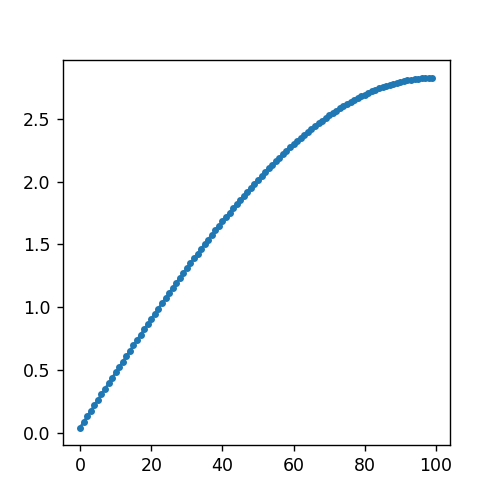

In [36]:
# Completar nombres de ejes, etc.
fig2, ax2 = plt.subplots()
fig2.set_size_inches(4, 4)
ax2.plot(w, marker='.')

Y ahora muestro los autovectores en un gráfico de colores (útil para sistemas de muchas masas)

<IPython.core.display.Javascript object>


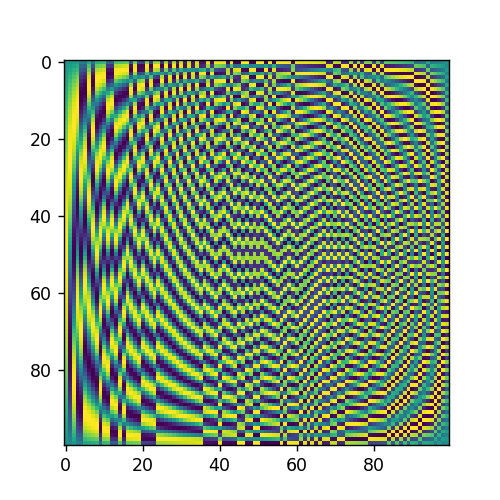

In [37]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(4, 4)
ax1.imshow(A)     

<IPython.core.display.Javascript object>


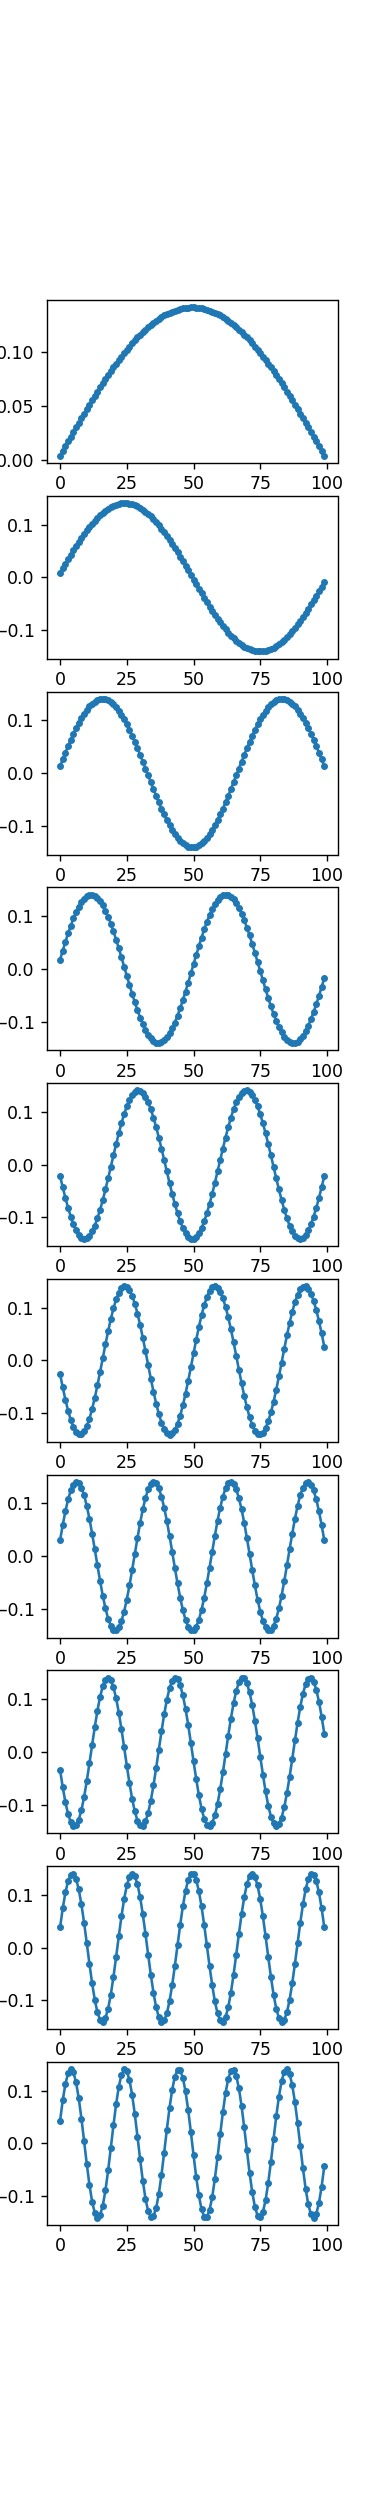

In [38]:
# Muestro hasta los primeros 10 modos
n = min(10, n_masas)
fig3, ax3 = plt.subplots(nrows=n,ncols=1)
fig3.set_size_inches(3, 2*n)
for i in range(0,n):
    ax3[i].plot(A[:,i], marker='.')

### Condiciones iniciales

La solución de mi sistema se escribe como:

$$ \mathbf{\Psi} = \sum_{j=1}^N c_i \mathbf{a_i} \exp(i \omega_j t) $$

donde $c_i$ son $N$ pesos complejos que se obtienen al plantear las condiciones iniciales. Para hallar los pesos, es necesario resolver:

$$ \begin{cases}
\mathbf{\Psi_0} = \Re[\mathbf{a_1} c_1 + ... + \mathbf{a_N} c_N ] \\ 
\mathbf{\Xi_0}  = \Re[i \mathbf{a_1} c_1 \omega_1 + ... + i \mathbf{a_N} c_N \omega_N]
 \end{cases}
$$ 

es decir (en notación matricial)

$$ \begin{cases}
\mathbf{\Psi_0} = \begin{bmatrix} \mathbf{a_1} & ... & \mathbf{a_N} \end{bmatrix} 
                  \begin{bmatrix} \Re[c_1] \\ \vdots \\ \Re[c_N] \end{bmatrix} \\
\mathbf{\Xi_0}  = \begin{bmatrix} \mathbf{a_1} & ... & \mathbf{a_N} \end{bmatrix} 
                  \begin{bmatrix} -\Im[c_1] \omega_1 \\ \vdots \\ -\Im[c_N] \omega_N \end{bmatrix}
 \end{cases}
$$

Debemos invertir la matriz de autovectores para poder despejar los pesos. Por suerte, las partes reales e imaginarias están desacopladas. La matriz de autovectores es una matriz cuyas columnas corresponden a cada autovector:

$$ \mathbf{A} = \begin{bmatrix} \mathbf{a_1} & ... & \mathbf{a_N} \end{bmatrix} $$

Usando la inversa, obtenemos

$$ \begin{cases}
\begin{bmatrix} \Re[c_1] \\ \vdots \\ \Re[c_N] \end{bmatrix} = \mathbf{A}^{-1} \mathbf{\Psi_0}\\
\begin{bmatrix} \Im[c_1] \omega_1 \\ \vdots \\ \Im[c_N] \omega_N \end{bmatrix} = - \mathbf{A}^{-1} \mathbf{\Xi_0}
\end{cases}
$$

Notar que en la segunda condición se puede despejar el vector de partes imaginarias de los pesos definiendo una matriz diagonal con las frecuencias angulares:

$$ \begin{bmatrix} \omega_1 & & 0 \\ & \ddots & \\ 0 & & \omega_N \end{bmatrix} $$

de modo que:

$$ \begin{bmatrix} \omega_1 & & 0 \\ & \ddots & \\ 0 & & \omega_N \end{bmatrix} \begin{bmatrix} \Im[c_1] \\ \vdots \\ \Im[c_N] \end{bmatrix} = - \mathbf{A}^{-1} \mathbf{\Xi_0} $$

Para despejar invertimos esta matriz y obtenemos:

$$ \begin{bmatrix} \Im[c_1] \\ \vdots \\ \Im[c_N] \end{bmatrix} = - \begin{bmatrix} 1/\omega_1 & & 0 \\ & \ddots & \\ 0 & & 1/\omega_N \end{bmatrix} \mathbf{A}^{-1} \mathbf{\Xi_0} $$


In [39]:
# Obtengo la inversa de la matriz de autovectores
A_inv = np.linalg.inv(A)

A_inv

array([[ 0.00437636,  0.00874848,  0.01311214, ...,  0.01311214,
         0.00874848,  0.00437636],
       [ 0.00874848,  0.01746312,  0.02611019, ..., -0.02611019,
        -0.01746312, -0.00874848],
       [ 0.01311214,  0.02611019,  0.03888104, ...,  0.03888104,
         0.02611019,  0.01311214],
       ...,
       [-0.01311214,  0.02611019, -0.03888104, ...,  0.03888104,
        -0.02611019,  0.01311214],
       [-0.00874848,  0.01746312, -0.02611019, ..., -0.02611019,
         0.01746312, -0.00874848],
       [ 0.00437636, -0.00874848,  0.01311214, ..., -0.01311214,
         0.00874848, -0.00437636]])

In [40]:
# Para hallar la parte real de los pesos simplemente aplico la matriz
# inversa de A a la condición inicial sobre las posiciones

c_real = np.dot(A_inv, psi_0)
c_real

array([[ 0.00437636],
       [ 0.00874848],
       [ 0.01311214],
       [ 0.01746312],
       [-0.0217972 ],
       [-0.02611019],
       [ 0.03039792],
       [-0.03465625],
       [ 0.03888104],
       [ 0.04306823],
       [ 0.04721374],
       [-0.05131358],
       [-0.05536378],
       [ 0.05936042],
       [ 0.06329963],
       [ 0.0671776 ],
       [ 0.07099058],
       [-0.07473488],
       [ 0.07840688],
       [-0.08200303],
       [-0.08551985],
       [ 0.08895393],
       [-0.09230195],
       [ 0.09556068],
       [ 0.09872696],
       [-0.10179772],
       [ 0.10477001],
       [-0.10764093],
       [ 0.11040772],
       [-0.1130677 ],
       [ 0.11561829],
       [-0.11805703],
       [ 0.12038155],
       [-0.12258962],
       [ 0.12467908],
       [-0.12664793],
       [-0.12849426],
       [ 0.13021627],
       [-0.13181231],
       [ 0.13328083],
       [ 0.1346204 ],
       [ 0.13582975],
       [-0.13690768],
       [ 0.13785317],
       [-0.13866529],
       [-0

In [41]:
# Para la parte compleja hay que pensar un poco más
c_imag = -np.dot(np.linalg.inv(np.diag(w)), np.dot(A_inv, xi_0))

c_imag


array([[-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
      

In [42]:
# Finalmente escribimos los pesos complejos
c = c_real + 1j*c_imag

c

array([[ 0.00437636+0.j],
       [ 0.00874848+0.j],
       [ 0.01311214+0.j],
       [ 0.01746312+0.j],
       [-0.0217972 +0.j],
       [-0.02611019+0.j],
       [ 0.03039792+0.j],
       [-0.03465625+0.j],
       [ 0.03888104+0.j],
       [ 0.04306823+0.j],
       [ 0.04721374+0.j],
       [-0.05131358+0.j],
       [-0.05536378+0.j],
       [ 0.05936042+0.j],
       [ 0.06329963+0.j],
       [ 0.0671776 +0.j],
       [ 0.07099058+0.j],
       [-0.07473488+0.j],
       [ 0.07840688+0.j],
       [-0.08200303+0.j],
       [-0.08551985+0.j],
       [ 0.08895393+0.j],
       [-0.09230195+0.j],
       [ 0.09556068+0.j],
       [ 0.09872696+0.j],
       [-0.10179772+0.j],
       [ 0.10477001+0.j],
       [-0.10764093+0.j],
       [ 0.11040772+0.j],
       [-0.1130677 +0.j],
       [ 0.11561829+0.j],
       [-0.11805703+0.j],
       [ 0.12038155+0.j],
       [-0.12258962+0.j],
       [ 0.12467908+0.j],
       [-0.12664793+0.j],
       [-0.12849426+0.j],
       [ 0.13021627+0.j],
       [-0.1

### Solución en función del tiempo

La parte que nos queda es la de evaluar la solución para los puntos del tiempo elegidos.

In [43]:
# Defino las matrices que contendran la solucion a lo largo del tiempo, cada
# fila representa una masa, y cada columna un sample de tiempo
psi = np.zeros([n_masas, n_samples])        # \_ ambas son arrays 2D
xi  = np.zeros([n_masas, n_samples])        # /

psi

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
psi.shape

(100, 10000)

In [50]:
# Voy calculando la solución para cada masa
for i in range(0, n_masas):
    
    # defino al autovector i-ésimo como un vector columna
    ai = A[:,i]
    ai.shape = (n_masas,1)
    
    # uso npm.repmat para expandir el autovector y la exponencial a una matriz
    # con n_masas filas y n_samples columnas
    psi = psi + c[i]*npm.repmat(ai,1,n_samples)*npm.repmat(np.exp(1j*w[i]*t), n_masas, 1)
    xi  = xi  + psi*1j*w[i]
    

array([[ 3.00000000e+00+0.00000000e+00j,  2.99999400e+00+5.76259631e-03j,
         2.99997600e+00+1.15251663e-02j, ...,
         7.82568704e-02+9.91334867e-02j,  7.79617921e-02+9.93388118e-02j,
         7.76661832e-02+9.95432758e-02j],
       [ 2.02041075e-16+0.00000000e+00j,  3.00059809e-06-1.64645437e-03j,
         1.20023683e-05-3.29289117e-03j, ...,
        -1.10041044e-01-2.31494092e-01j, -1.09385043e-01-2.31765729e-01j,
        -1.08728382e-01-2.32035495e-01j],
       [ 9.81202966e-18+0.00000000e+00j,  5.00093334e-13-2.74409892e-04j,
         8.00326123e-12-5.48822180e-04j, ...,
         3.47478118e-02+3.72232594e-01j,  3.37035010e-02+3.72272667e-01j,
         3.26592372e-02+3.72309859e-01j],
       ...,
       [ 1.15399769e-17+0.00000000e+00j, -1.02321580e-18-9.51353237e-10j,
        -1.69406589e-19-1.90270648e-09j, ...,
        -7.95061716e-15-1.01527228e-05j, -7.80611334e-15-1.01538723e-05j,
        -7.77434622e-15-1.01550219e-05j],
       [-1.36169017e-16+0.00000000e+00j, -1.

In [52]:
psi

array([[ 3.00000000e+00+0.00000000e+00j,  2.99999400e+00+5.76259631e-03j,
         2.99997600e+00+1.15251663e-02j, ...,
         7.82568704e-02+9.91334867e-02j,  7.79617921e-02+9.93388118e-02j,
         7.76661832e-02+9.95432758e-02j],
       [ 2.02041075e-16+0.00000000e+00j,  3.00059809e-06-1.64645437e-03j,
         1.20023683e-05-3.29289117e-03j, ...,
        -1.10041044e-01-2.31494092e-01j, -1.09385043e-01-2.31765729e-01j,
        -1.08728382e-01-2.32035495e-01j],
       [ 9.81202966e-18+0.00000000e+00j,  5.00093334e-13-2.74409892e-04j,
         8.00326123e-12-5.48822180e-04j, ...,
         3.47478118e-02+3.72232594e-01j,  3.37035010e-02+3.72272667e-01j,
         3.26592372e-02+3.72309859e-01j],
       ...,
       [ 1.15399769e-17+0.00000000e+00j, -1.02321580e-18-9.51353237e-10j,
        -1.69406589e-19-1.90270648e-09j, ...,
        -7.95061716e-15-1.01527228e-05j, -7.80611334e-15-1.01538723e-05j,
        -7.77434622e-15-1.01550219e-05j],
       [-1.36169017e-16+0.00000000e+00j, -1.

<IPython.core.display.Javascript object>


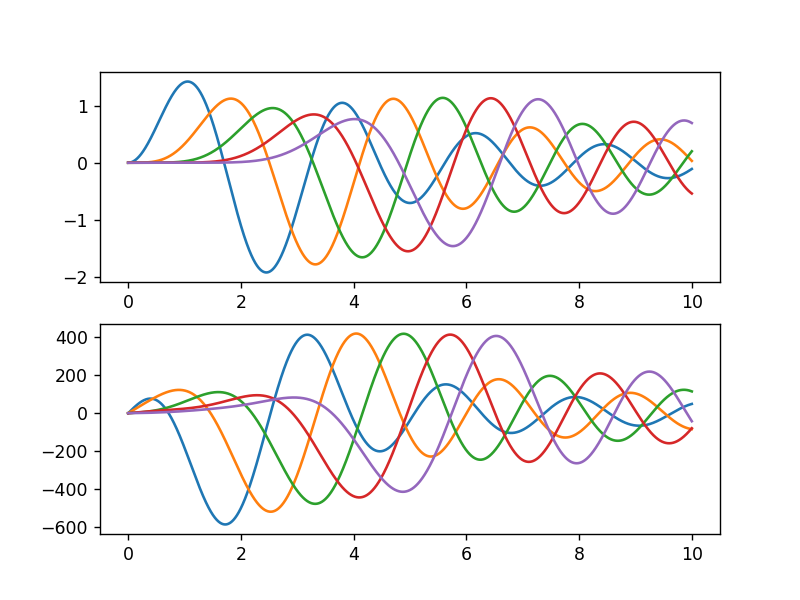

In [51]:
# Grafico psi y xi versus t para hasta 10 masas
n = min(5, n_masas)
fig4, ax4 = plt.subplots(nrows=2,ncols=1)
# transpongo para poder graficar las dos masas juntas
ax4[0].plot(t, np.real(psi[1:n+1,:].T)) 
ax4[1].plot(t, np.real(xi[1:n+1,:].T))

<IPython.core.display.Javascript object>


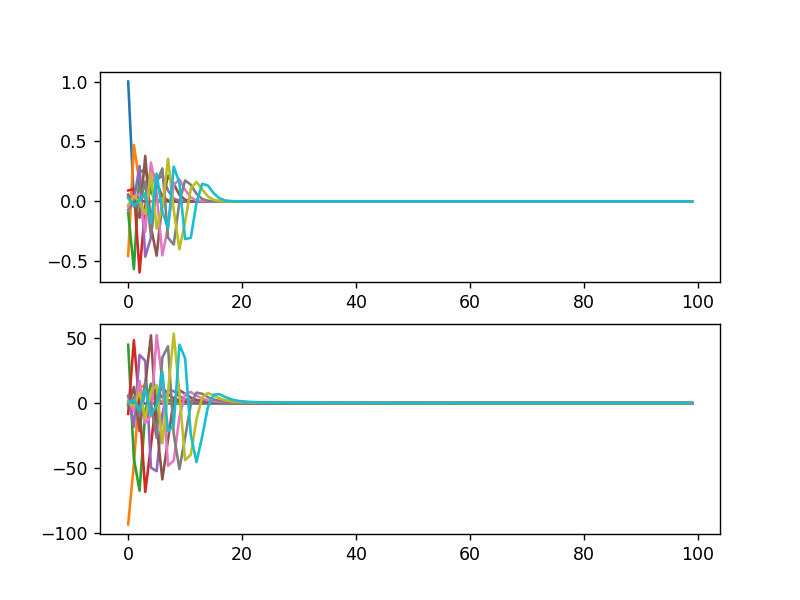

In [47]:
# Grafico el movimiento (psi) y la velocidad (xi) colectives para 10 instantes
# de tiempo entre t_min y t_max (útil para sistemas de muchas masas)
fig5, ax5 = plt.subplots(nrows=2,ncols=1)
samples = np.round(np.linspace(0, len(t) - 1, 10)).astype(int)

ax5[0].plot(np.real(psi[:,samples])) 
ax5[1].plot(np.real(xi[:,samples])) 

In [48]:
samples


array([   0, 1111, 2222, 3333, 4444, 5555, 6666, 7777, 8888, 9999])